## Set Up
Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from keras import models
from keras import layers

Using TensorFlow backend.


Define a utility function to plot model predictions

In [0]:
def plot_decision_boundary(model_fit, preprocess_x_fn, x1lim, x2lim, gridlen, train_x, train_y):
    '''
    Plot decision boundaries for a Keras model fit with 2 quantitative inputs
    
    Arugments:
     - model_fit: keras model fit
     - preprocess_x_fn: function to preprocess x
     - x1lim: tuple of lower and upper limits for x1
     - x2lim: tuple of lower and upper limits for x2
     - gridlen: how many values of x1 and x2 for which to obtain predictions
     - train_x: n by 2 array of x values for training set
     - train_y: n by 1 array of y values for training set
    '''
    dx1 = (x1lim[1] - x1lim[0])/gridlen
    dx2 = (x2lim[1] - x2lim[0])/gridlen
    background_x0, background_x1 = np.mgrid[slice(x1lim[0], x1lim[1] + dx1, dx1), slice(x2lim[0], x2lim[1] + dx2, dx2)]
    background_x0_long = background_x0[0:gridlen,0:gridlen].reshape((gridlen**2, 1))
    background_x1_long = background_x1[0:gridlen,0:gridlen].reshape((gridlen**2, 1))
    background_x = np.concatenate((background_x0_long, background_x1_long), axis = 1)
    if preprocess_x_fn is not None:
        background_x = preprocess_x_fn(background_x)
    
    yhat_long = (model_fit.predict(background_x) > 0.5)
    yhat = yhat_long.reshape((gridlen, gridlen))

    fig, ax = plt.subplots()
    im = ax.pcolormesh(background_x0, background_x1, yhat, norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'), alpha = 0.2, edgecolors = 'none', antialiased = True)
    im = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
    plt.show()

## Example 1

### Data Generation

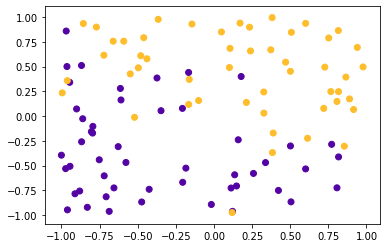

In [3]:
# set seed for reproducibility
np.random.seed(1)

def sim_data_ex1(n):
  '''
  A function to randomly generate data with a linear decision boundary
  
  Arguments:
   - n: integer sample size
  
  Return:
   - (x, y) tuple.  x is a numpy array of shape (n, 2) with feature values;
     y is a numpy array of shape (n, 1) with responses (0 or 1)
  '''
  # generate (x1, x2) (n by 2 matrix with observations in rows)
  x = 2 * np.random.random((n, 2)) - 1

  # parameters
  b = 0
  w = np.array([[3], [4]])

  # probability of class 1
  p1 = np.exp(b + np.dot(x, w)) / (1 + np.exp(b + np.dot(x, w)))
  y = np.random.binomial(1, p1)#[:, 0]

  return((x, y))

# generate training data and plot it
train_x, train_y = sim_data_ex1(n = 100)

# make a plot
fig, ax = plt.subplots()
scatter = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

### Fit a logistic regression model:

In [4]:
# define a logistic regression model
logistic_model = models.Sequential()
logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (2,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
logistic_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
logistic_model.fit(train_x, train_y, epochs = 1000, batch_size = 32)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





100/100 [==============================] - 10s 97ms/step - loss: 0.9359 - acc: 0.2900
Epoch 2/1000
100/100 [==============================] - 0s 179us/step - loss: 0.9320 - acc: 0.2900
Epoch 3/1000
100/100 [==============================] - 0s 167us/step - loss: 0.9271 - acc: 0.2900
Epoch 4/1000
100/100 [==============================] - 0s 132us/step - loss: 0.9233 - acc: 0.3000
Epoch 5/1000
100/100 [==============================] - 0s 141us/step - loss: 0.9194 - acc: 0.3000
Epoch 6/1000
100/100 [==============================] - 0s 113us/step - loss: 0.9152 - acc: 0.3000
Epoch 7/1000
100/100 [==============================] - 0s 131us/step - loss: 0.9114 - acc: 0.3000
Epoch 8/1000
100/100 [==============================] - 0s 130us/step - loss: 0.9071 - acc: 0.3100
Epoch 9/1000
100/100 [==============================] - 0s 143us/step - loss: 0.9030 - acc: 0.3100
Ep

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


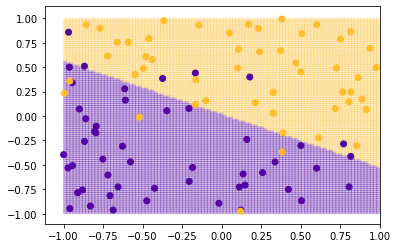

In [0]:
logistic_model.summary()
plot_decision_boundary(logistic_model, None, (-1, 1), (-1, 1), 101, train_x, train_y)

test_y shape = (100, 1)
test_yhat shape = (100, 1)
test_y and test_yhat next to each other:
[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]
classification accuracy = 0.83
100/100 [==============================] - 0s 240us/step
results from calling evaluate: [0.3934104287624359, 0.83]


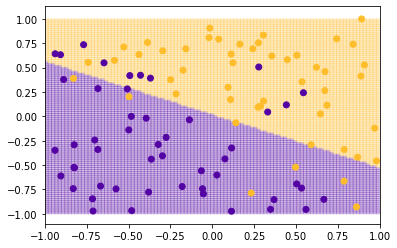

In [5]:
# get performance on a new test set generated the same way
test_x, test_y = sim_data_ex1(n = 100)
test_yhat = logistic_model.predict_classes(test_x)

print("test_y shape = " + str(test_y.shape))
print("test_yhat shape = " + str(test_yhat.shape))
print("test_y and test_yhat next to each other:")
print(np.concatenate((test_y, test_yhat), axis = 1))

test_accuracy = np.mean(test_y == test_yhat)
print("classification accuracy = " + str(test_accuracy))

print("results from calling evaluate: " + str(logistic_model.evaluate(test_x, test_y)))

plot_decision_boundary(logistic_model, None, (-1, 1), (-1, 1), 101, test_x, test_y)

## Example 2
### Data Generation

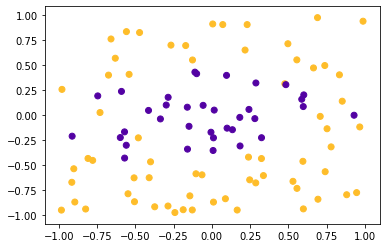

In [10]:
# set seed for reproducibility
np.random.seed(2)

def sim_data_ex2(n):
  '''
  A function to randomly generate data with an elliptical decision boundary
  
  Arguments:
   - n: integer sample size
  
  Return:
   - (x, y) tuple.  x is a numpy array of shape (n, 2) with feature values;
     y is a numpy array of shape (n, 1) with responses (0 or 1)
  '''
  # generate (x1, x2) (observations in rows)
  x = 2 * np.random.random((n, 2)) - 1

  # the model actually uses x^2
  x_squared = x**2

  # parameters
  b = -5
  w = np.array([[5 * 12/9], [5 * 5]])

  # prob of class 1
  p1 = np.exp(b + np.dot(x_squared, w)) / (1 + np.exp(b + np.dot(x_squared, w)))

  # generate y
  y = np.random.binomial(1, p1)

  # return
  return((x, y))

# simulate training data and plot it
(train_x, train_y) = sim_data_ex2(n = 100)

fig, ax = plt.subplots()
scatter = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

# simulate test set data to compare models with later
(test_x, test_y) = sim_data_ex2(n = 100)

### Fit a Logistic Regression Model

In [11]:
# define a logistic regression model
logistic_model = models.Sequential()
logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (2,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
logistic_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
logistic_model.fit(train_x, train_y, epochs = 1000, batch_size = 32)

Epoch 1/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.7217 - acc: 0.5300
Epoch 2/1000
100/100 [==============================] - 0s 157us/step - loss: 0.7207 - acc: 0.5300
Epoch 3/1000
100/100 [==============================] - 0s 143us/step - loss: 0.7197 - acc: 0.5300
Epoch 4/1000
100/100 [==============================] - 0s 143us/step - loss: 0.7188 - acc: 0.5300
Epoch 5/1000
100/100 [==============================] - 0s 161us/step - loss: 0.7183 - acc: 0.5300
Epoch 6/1000
100/100 [==============================] - 0s 126us/step - loss: 0.7176 - acc: 0.5300
Epoch 7/1000
100/100 [==============================] - 0s 128us/step - loss: 0.7169 - acc: 0.5300
Epoch 8/1000
100/100 [==============================] - 0s 162us/step - loss: 0.7162 - acc: 0.5300
Epoch 9/1000
100/100 [==============================] - 0s 163us/step - loss: 0.7151 - acc: 0.5300
Epoch 10/1000
100/100 [==============================] - 0s 153us/step - loss: 0.7145 - acc: 0.5200
Epoch 11/10

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


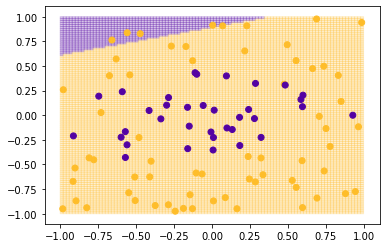

Test set evaluation:
100/100 [==============================] - 0s 161us/step


[0.6356617593765259, 0.61]

In [13]:
logistic_model.summary()
plot_decision_boundary(logistic_model, None, (-1, 1), (-1, 1), 101, train_x, train_y)
print("Test set evaluation:")
logistic_model.evaluate(test_x, test_y)

### Fit a *Quadratic* Logistic Regression Model

In [17]:
# define a logistic regression model
quadratic_logistic_model = models.Sequential()
quadratic_logistic_model.add(layers.Dense(1, activation = 'sigmoid', input_shape = (4,)))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
quadratic_logistic_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
# input is x and x^2 together
def add_x_squared(x):
    return(np.concatenate((x, x**2), axis = 1))
x_full = add_x_squared(train_x)
print(x_full[range(10), :])

quadratic_logistic_model.fit(x_full, train_y, epochs = 2000, batch_size = 32)

[[-1.28010196e-01 -9.48147536e-01  1.63866102e-02  8.98983751e-01]
 [ 9.93249558e-02 -1.29355215e-01  9.86544684e-03  1.67327716e-02]
 [-1.59264396e-01 -3.39330358e-01  2.53651478e-02  1.15145092e-01]
 [-5.90702732e-01  2.38541933e-01  3.48929718e-01  5.69022537e-02]
 [-4.00690653e-01 -4.66345450e-01  1.60552999e-01  2.17478079e-01]
 [ 2.42267666e-01  5.82841886e-02  5.86936218e-02  3.39704664e-03]
 [-7.30840109e-01  2.71562425e-02  5.34127265e-01  7.37461508e-04]
 [-6.31120269e-01  5.70670296e-01  3.98312794e-01  3.25664586e-01]
 [ 7.07950585e-01 -1.15263252e-02  5.01194031e-01  1.32856173e-04]
 [ 6.93122971e-01 -8.40709046e-01  4.80419453e-01  7.06791700e-01]]
Epoch 1/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.6376 - acc: 0.6000
Epoch 2/2000
100/100 [==============================] - 0s 121us/step - loss: 0.6365 - acc: 0.5900
Epoch 3/2000
100/100 [==============================] - 0s 151us/step - loss: 0.6355 - acc: 0.5900
Epoch 4/2000
100/100 [============

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


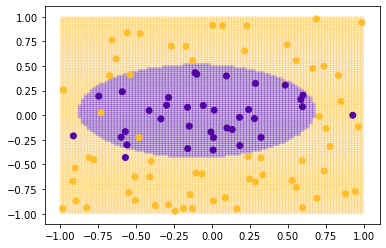

100/100 [==============================] - 0s 823us/step


[0.2906468677520752, 0.91]

In [18]:
quadratic_logistic_model.summary()
plot_decision_boundary(quadratic_logistic_model, add_x_squared, (-1, 1), (-1, 1), 101, train_x, train_y)
quadratic_logistic_model.evaluate(add_x_squared(test_x), test_y)

### Fit a neural network with 1 hidden layer with 2 units

In [20]:
# define a neural network model
nnet_model1 = models.Sequential()
nnet_model1.add(layers.Dense(2, activation = 'tanh', input_shape = (2,)))
nnet_model1.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model1.fit(train_x, train_y, epochs = 2000, batch_size = 32)

Epoch 1/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.6917 - acc: 0.5300
Epoch 2/2000
100/100 [==============================] - 0s 146us/step - loss: 0.6905 - acc: 0.5100
Epoch 3/2000
100/100 [==============================] - 0s 203us/step - loss: 0.6896 - acc: 0.5200
Epoch 4/2000
100/100 [==============================] - 0s 217us/step - loss: 0.6887 - acc: 0.5200
Epoch 5/2000
100/100 [==============================] - 0s 221us/step - loss: 0.6877 - acc: 0.5300
Epoch 6/2000
100/100 [==============================] - 0s 163us/step - loss: 0.6869 - acc: 0.5200
Epoch 7/2000
100/100 [==============================] - 0s 177us/step - loss: 0.6859 - acc: 0.5300
Epoch 8/2000
100/100 [==============================] - 0s 196us/step - loss: 0.6852 - acc: 0.5300
Epoch 9/2000
100/100 [==============================] - 0s 183us/step - loss: 0.6843 - acc: 0.5300
Epoch 10/2000
100/100 [==============================] - 0s 184us/step - loss: 0.6835 - acc: 0.5300
Epoch 11/20

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


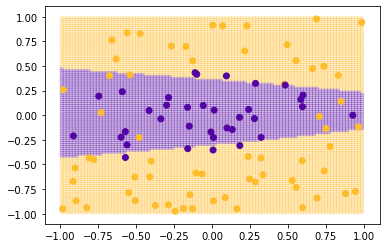

100/100 [==============================] - 0s 954us/step


[0.47176710605621336, 0.86]

In [21]:
nnet_model1.summary()
plot_decision_boundary(nnet_model1, None, (-1, 1), (-1, 1), 101, train_x, train_y)
nnet_model1.evaluate(test_x, test_y)

### Fit a neural network model with 2 hidden layers, each with 20 units

In [23]:
# define a neural network model with 2 hidden layers
nnet_model2 = models.Sequential()
nnet_model2.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model2.add(layers.Dense(20, activation = 'tanh'))
nnet_model2.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model2.fit(train_x, train_y, epochs = 2000, batch_size = 32)

Epoch 1/2000
100/100 [==============================] - 0s 4ms/step - loss: 0.6988 - acc: 0.4400
Epoch 2/2000
100/100 [==============================] - 0s 160us/step - loss: 0.6881 - acc: 0.4700
Epoch 3/2000
100/100 [==============================] - 0s 171us/step - loss: 0.6793 - acc: 0.5400
Epoch 4/2000
100/100 [==============================] - 0s 179us/step - loss: 0.6727 - acc: 0.5500
Epoch 5/2000
100/100 [==============================] - 0s 171us/step - loss: 0.6673 - acc: 0.5600
Epoch 6/2000
100/100 [==============================] - 0s 167us/step - loss: 0.6625 - acc: 0.5400
Epoch 7/2000
100/100 [==============================] - 0s 177us/step - loss: 0.6584 - acc: 0.5400
Epoch 8/2000
100/100 [==============================] - 0s 168us/step - loss: 0.6555 - acc: 0.5500
Epoch 9/2000
100/100 [==============================] - 0s 176us/step - loss: 0.6531 - acc: 0.5400
Epoch 10/2000
100/100 [==============================] - 0s 181us/step - loss: 0.6504 - acc: 0.5400
Epoch 11/20

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


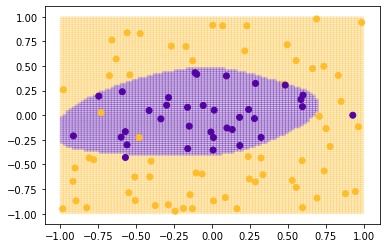

100/100 [==============================] - 0s 1ms/step


[0.26402188301086427, 0.88]

In [25]:
nnet_model2.summary()
plot_decision_boundary(nnet_model2, None, (-1, 1), (-1, 1), 101, train_x, train_y)
nnet_model2.evaluate(test_x, test_y)

## Example 3

This example is adapted from http://cs231n.github.io/neural-networks-case-study/

### Data Generation

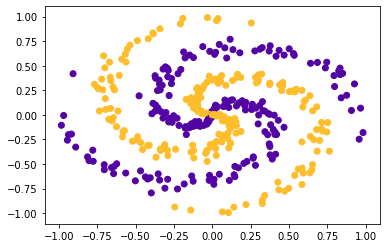

In [28]:
# set seed for reproducibility
np.random.seed(3)

def sim_data_ex3(n):
  '''
  A function to randomly generate data with a spiral-shaped decision boundary
  
  Arguments:
   - n: integer sample size per branch of the spiral
  
  Return:
   - (x, y) tuple.  x is a numpy array of shape (4n, 2) with feature values;
     y is a numpy array of shape (4n, 1) with responses (0 or 1)
  '''
  # number of branches
  k = 4

  # initialize data matrix (each row = single example)
  x = np.zeros((n*k, 2))
  y = np.zeros((n*k, 1)) # class labels
  for j in range(k):
    ix = range(n*j,n*(j+1))
    r = np.linspace(0.0,1,n) # radius
    t = np.linspace(j * 2 * 2 * np.pi / k + j * 2 * np.pi / k, (j+1) * 2 * 2 * np.pi / k + (j+1) * 2 * np.pi / k,n) + np.random.randn(n)*0.2 # theta
    x[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix, :] = np.mod(j, 2)

  return((x, y))

# simulate training set and make a plot
(train_x, train_y) = sim_data_ex3(n = 100)
fig, ax = plt.subplots()
scatter = ax.scatter(train_x[:, 0], train_x[:, 1], c = train_y[:, 0], norm = plt.Normalize(-0.2, 1.2), cmap = plt.get_cmap('plasma'))
plt.show()

# simulate test set data for model evaluation
(test_x, test_y) = sim_data_ex3(n = 100)

### Fit a neural network with 1 hidden layer with 20 units

In [29]:
# define a neural network model
nnet_model1 = models.Sequential()
nnet_model1.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model1.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model1.fit(train_x, train_y, epochs = 1000, batch_size = 32)

Epoch 1/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.7005 - acc: 0.5125
Epoch 2/1000
400/400 [==============================] - 0s 111us/step - loss: 0.6985 - acc: 0.5150
Epoch 3/1000
400/400 [==============================] - 0s 106us/step - loss: 0.6972 - acc: 0.5150
Epoch 4/1000
400/400 [==============================] - 0s 99us/step - loss: 0.6963 - acc: 0.5200
Epoch 5/1000
400/400 [==============================] - 0s 109us/step - loss: 0.6958 - acc: 0.4850
Epoch 6/1000
400/400 [==============================] - 0s 110us/step - loss: 0.6953 - acc: 0.4625
Epoch 7/1000
400/400 [==============================] - 0s 105us/step - loss: 0.6948 - acc: 0.4925
Epoch 8/1000
400/400 [==============================] - 0s 103us/step - loss: 0.6943 - acc: 0.4850
Epoch 9/1000
400/400 [==============================] - 0s 103us/step - loss: 0.6943 - acc: 0.4850
Epoch 10/1000
400/400 [==============================] - 0s 106us/step - loss: 0.6941 - acc: 0.4650
Epoch 11/100

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


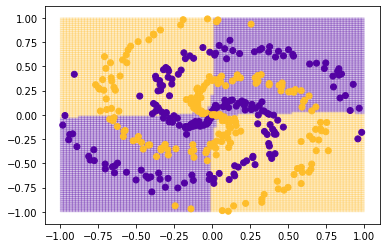

400/400 [==============================] - 0s 432us/step


[0.6540589046478271, 0.6075]

In [30]:
nnet_model1.summary()
plot_decision_boundary(nnet_model1, None, (-1, 1), (-1, 1), 101, train_x, train_y)
nnet_model1.evaluate(test_x, test_y)

### Fit a neural network with 2 hidden layers, each with 20 units

In [31]:
# define a neural network model with 2 hidden layers
nnet_model2 = models.Sequential()
nnet_model2.add(layers.Dense(20, activation = 'tanh', input_shape = (2,)))
nnet_model2.add(layers.Dense(20, activation = 'tanh'))
nnet_model2.add(layers.Dense(1, activation = 'sigmoid'))

# compile the model using stochastic gradient descent for optmization,
# binary cross-entropy loss, and measuring performance by classification accuracy
nnet_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Estimate the model parameters
nnet_model2.fit(train_x, train_y, epochs = 1000, batch_size = 32)

Epoch 1/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.7032 - acc: 0.4600
Epoch 2/1000
400/400 [==============================] - 0s 113us/step - loss: 0.6965 - acc: 0.4650
Epoch 3/1000
400/400 [==============================] - 0s 156us/step - loss: 0.6939 - acc: 0.4975
Epoch 4/1000
400/400 [==============================] - 0s 120us/step - loss: 0.6936 - acc: 0.5000
Epoch 5/1000
400/400 [==============================] - 0s 128us/step - loss: 0.6934 - acc: 0.5400
Epoch 6/1000
400/400 [==============================] - 0s 117us/step - loss: 0.6937 - acc: 0.4850
Epoch 7/1000
400/400 [==============================] - 0s 125us/step - loss: 0.6933 - acc: 0.4725
Epoch 8/1000
400/400 [==============================] - 0s 129us/step - loss: 0.6936 - acc: 0.4875
Epoch 9/1000
400/400 [==============================] - 0s 122us/step - loss: 0.6942 - acc: 0.5100
Epoch 10/1000
400/400 [==============================] - 0s 114us/step - loss: 0.6935 - acc: 0.5150
Epoch 11/10

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


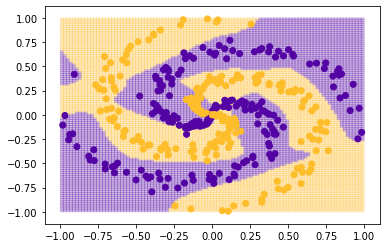

400/400 [==============================] - 0s 461us/step


[0.3413727281987667, 0.8725]

In [33]:
nnet_model2.summary()
plot_decision_boundary(nnet_model2, None, (-1, 1), (-1, 1), 101, train_x, train_y)
nnet_model2.evaluate(test_x, test_y)